# GRAPHS FOR EXPERIMENT 1

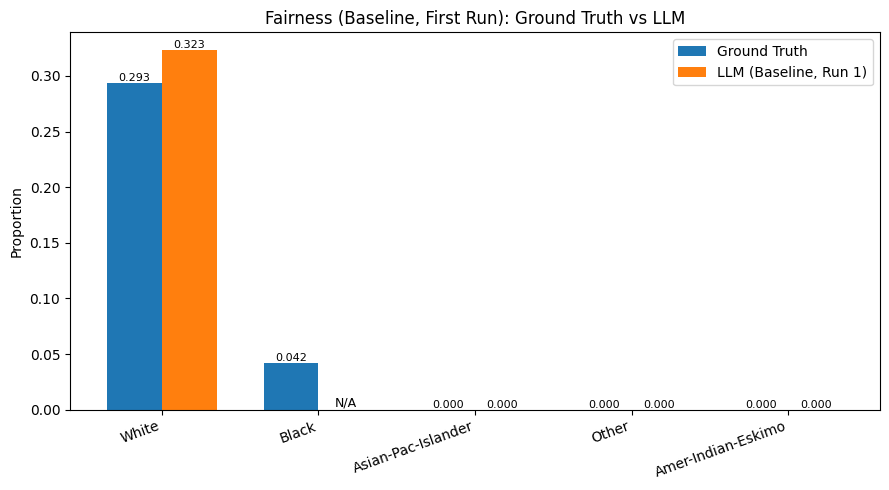

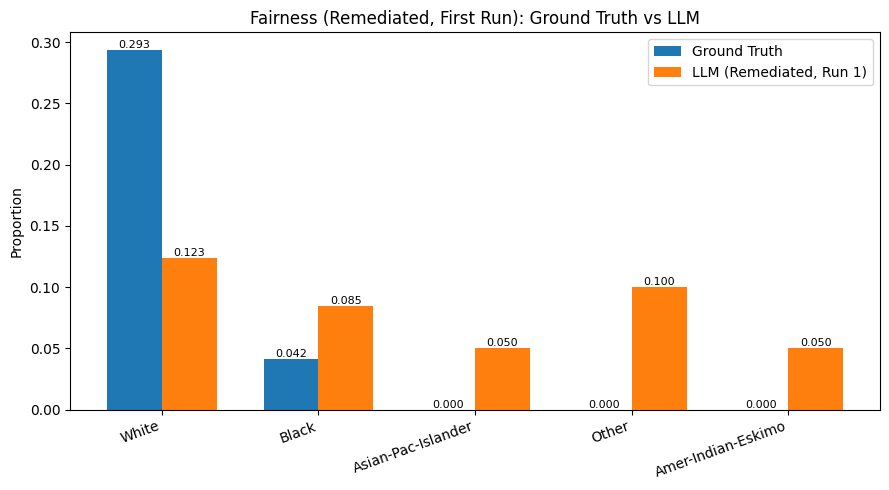

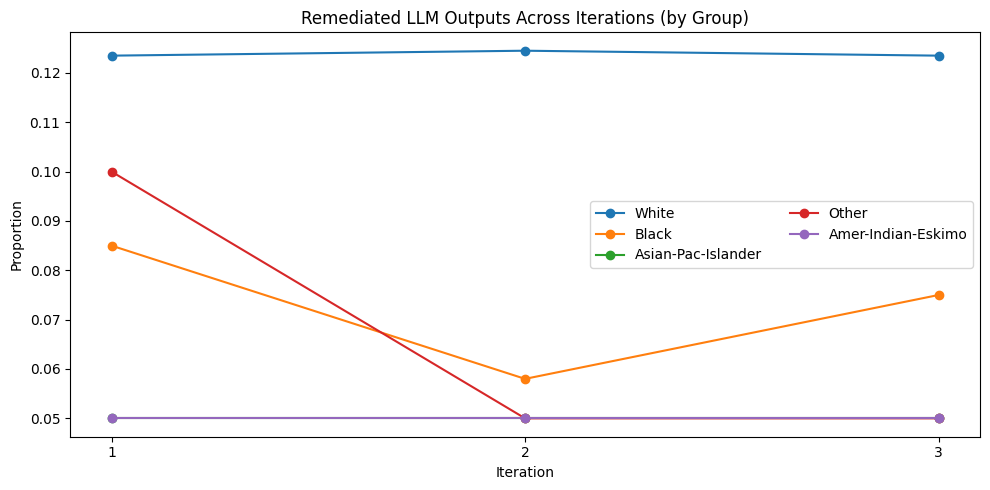

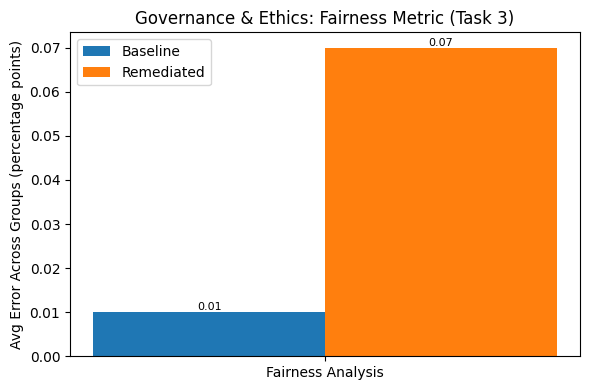

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# ================== Data (from your logs) ==================
groups = ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

# Ground truth (shared)
gt = [0.2934131736526946, 0.041666666666666664, 0.0, 0.0, 0.0]

# Baseline — first run (note: 'Black' is missing in LLM output keys)
baseline_llm_first = {
    'White': 0.323,
    'Black': None,                # missing
    'Asian-Pac-Islander': 0.0,
    'Other': 0.0,
    'Amer-Indian-Eskimo': 0.0
}

# Remediated — three iterations of LLM outputs
rem_llm_iters = [
    [0.1235, 0.085, 0.05, 0.1, 0.05],   # Iteration 1
    [0.1245, 0.058, 0.05, 0.05, 0.05],  # Iteration 2
    [0.1235, 0.075, 0.05, 0.05, 0.05],  # Iteration 3
]
rem_llm_first = rem_llm_iters[0]

# Fairness metric (Avg Error Across Groups, percentage points)
baseline_fairness_pp = 0.01
remediated_fairness_pp = 0.07

# ================== Helpers ==================
def to_aligned_list(d, keys):
    """Map dict to list in 'keys' order, keeping None if absent."""
    return [d.get(k, None) for k in keys]

def values_for_plot(seq):
    """Replace None with 0 for plotting bars and return a mask of missing values."""
    vals, mask_none = [], []
    for v in seq:
        if v is None:
            vals.append(0.0)
            mask_none.append(True)
        else:
            vals.append(v)
            mask_none.append(False)
    return vals, mask_none

def annotate_na(ax, bars, mask_none):
    """Write N/A on bars corresponding to None values."""
    for bar, is_none in zip(bars, mask_none):
        if is_none:
            ax.text(
                bar.get_x() + bar.get_width()/2.0,
                bar.get_height(),
                "N/A",
                ha="center",
                va="bottom",
                fontsize=9
            )

def add_value_labels(ax, bars, fmt="{:.3f}", skip_mask=None):
    """Add numeric labels on bars; optionally skip where skip_mask is True."""
    for i, bar in enumerate(bars):
        if skip_mask is not None and skip_mask[i]:
            continue
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, h, fmt.format(h),
                ha='center', va='bottom', fontsize=8)

# ================== 1) Baseline: GT vs LLM (first run) ==================
x = np.arange(len(groups))
width = 0.35

fig, ax = plt.subplots(figsize=(9, 5))
baseline_llm_seq = to_aligned_list(baseline_llm_first, groups)
gt_vals, _ = values_for_plot(gt)
llm_vals, llm_missing = values_for_plot(baseline_llm_seq)

bars_gt = ax.bar(x - width/2, gt_vals, width, label='Ground Truth')
bars_llm = ax.bar(x + width/2, llm_vals, width, label='LLM (Baseline, Run 1)')

annotate_na(ax, bars_llm, llm_missing)
add_value_labels(ax, bars_gt)
add_value_labels(ax, bars_llm, skip_mask=llm_missing)

ax.set_ylabel('Proportion')
ax.set_title('Fairness (Baseline, First Run): Ground Truth vs LLM')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# ================== 2) Remediated: GT vs LLM (first run) ==================
fig, ax = plt.subplots(figsize=(9, 5))
rem_vals, rem_missing = values_for_plot(rem_llm_first)

bars_gt = ax.bar(x - width/2, gt_vals, width, label='Ground Truth')
bars_llm = ax.bar(x + width/2, rem_vals, width, label='LLM (Remediated, Run 1)')

# No N/A expected here, but we keep logic generic
annotate_na(ax, bars_llm, rem_missing)
add_value_labels(ax, bars_gt)
add_value_labels(ax, bars_llm)

ax.set_ylabel('Proportion')
ax.set_title('Fairness (Remediated, First Run): Ground Truth vs LLM')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

# ================== 3) Remediated: LLM across 3 iterations (per group) ==================
fig, ax = plt.subplots(figsize=(10, 5))
iters = np.arange(1, len(rem_llm_iters) + 1)

# Plot a line per group across iterations
for gi, g in enumerate(groups):
    ys = [rem_llm_iters[k][gi] for k in range(len(rem_llm_iters))]
    ax.plot(iters, ys, marker='o', label=g)

ax.set_xlabel('Iteration')
ax.set_ylabel('Proportion')
ax.set_title('Remediated LLM Outputs Across Iterations (by Group)')
ax.set_xticks(iters)
ax.legend(ncol=2)
plt.tight_layout()
plt.show()

# ================== 4) Fairness metric (pp): Baseline vs Remediated ==================
labels = ['Fairness Analysis']
x2 = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(6, 4))
bars_base = ax.bar(x2 - width/2, [baseline_fairness_pp], width, label='Baseline')
bars_rem  = ax.bar(x2 + width/2, [remediated_fairness_pp], width, label='Remediated')

add_value_labels(ax, bars_base, fmt="{:.2f}")
add_value_labels(ax, bars_rem, fmt="{:.2f}")

ax.set_ylabel('Avg Error Across Groups (percentage points)')
ax.set_title('Governance & Ethics: Fairness Metric (Task 3)')
ax.set_xticks(x2)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


# GRAPHS FOR EXPERIMENT 2

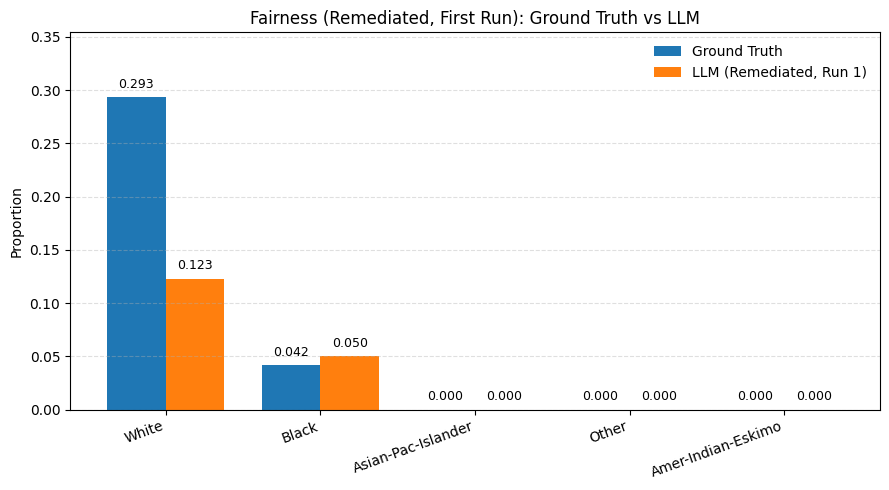

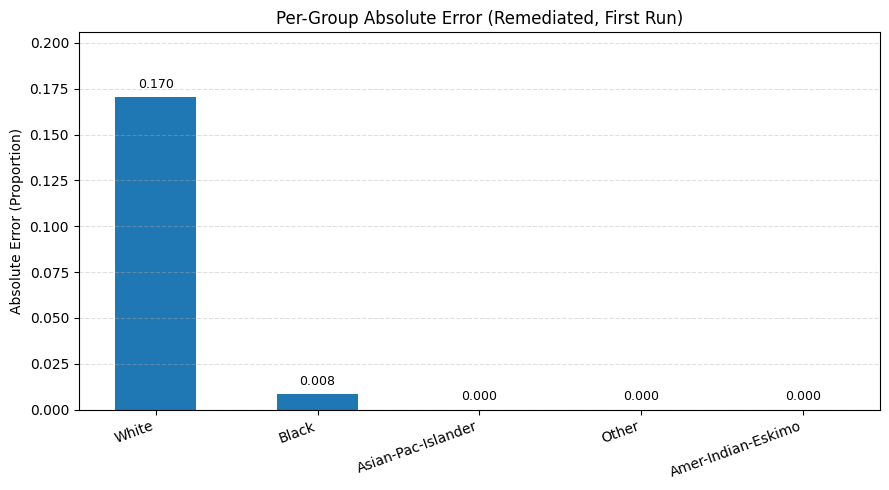

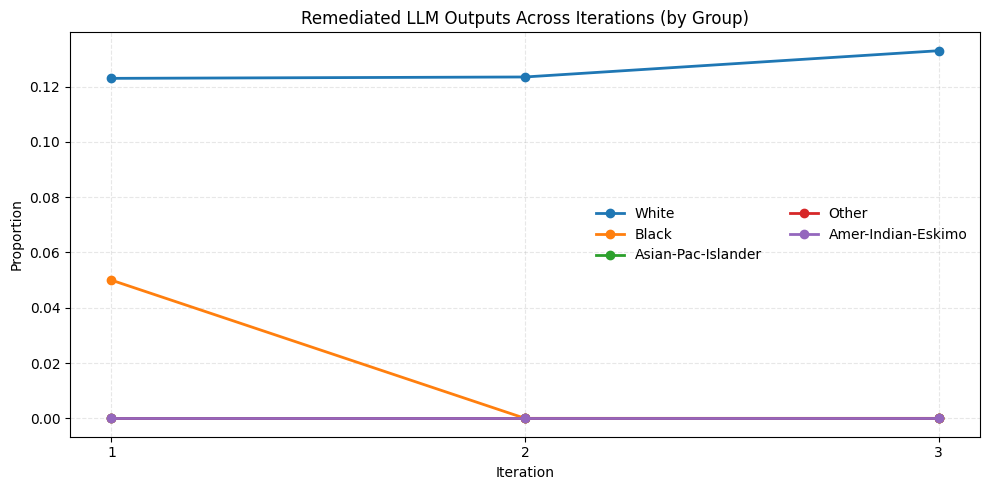

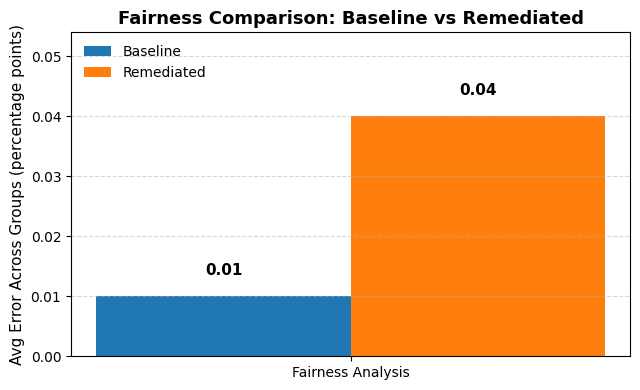

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# ================== Data (from your latest logs) ==================
groups = ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

# Ground truth (shared)
gt = [0.2934131736526946, 0.041666666666666664, 0.0, 0.0, 0.0]

# Remediated — first run (from "LLM output values: [0.123, 0.05, 0.0, 0.0, 0.0]")
rem_llm_first = [0.123, 0.05, 0.0, 0.0, 0.0]

# Remediated — three iterations (from the lines below the dict)
rem_llm_iters = [
    [0.123,  0.05, 0.0, 0.0, 0.0],  # Iteration 1
    [0.1235, 0.0,  0.0, 0.0, 0.0],  # Iteration 2
    [0.133,  0.0,  0.0, 0.0, 0.0],  # Iteration 3
]

# Average error across groups (percentage points)
baseline_fairness_pp   = 0.01
remediated_fairness_pp = 0.04

# ================== Helpers ==================
def add_value_labels(ax, bars, fmt="{:.3f}"):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + (0.02 * (ax.get_ylim()[1] if ax.get_ylim()[1] else 1)),
                fmt.format(h), ha='center', va='bottom', fontsize=9)

def set_room_on_top(ax, top_pad=1.25):
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax * top_pad if ymax > 0 else 1)

# ================== 1) GT vs LLM (Remediated, Run 1) ==================
x = np.arange(len(groups))
width = 0.38

fig, ax = plt.subplots(figsize=(9, 5))
bars_gt  = ax.bar(x - width/2, gt,            width, label='Ground Truth')
bars_llm = ax.bar(x + width/2, rem_llm_first, width, label='LLM (Remediated, Run 1)')

add_value_labels(ax, bars_gt)
add_value_labels(ax, bars_llm)
set_room_on_top(ax, 1.15)

ax.set_ylabel('Proportion')
ax.set_title('Fairness (Remediated, First Run): Ground Truth vs LLM')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.legend(frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
# plt.savefig("fairness_remediated_run1_gt_vs_llm.png", dpi=200)

# ================== 2) Per-group absolute errors (Remediated, Run 1) ==================
abs_errors = [abs(a - b) for a, b in zip(gt, rem_llm_first)]

fig, ax = plt.subplots(figsize=(9, 5))
bars_err = ax.bar(x, abs_errors, width=0.5, label='|LLM - GT| (Run 1)')
add_value_labels(ax, bars_err)
set_room_on_top(ax, 1.15)

ax.set_ylabel('Absolute Error (Proportion)')
ax.set_title('Per-Group Absolute Error (Remediated, First Run)')
ax.set_xticks(x)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
# plt.savefig("fairness_remediated_run1_abs_errors.png", dpi=200)

# ================== 3) Remediated LLM outputs across iterations (per group) ==================
iters = np.arange(1, len(rem_llm_iters) + 1)

fig, ax = plt.subplots(figsize=(10, 5))
for gi, g in enumerate(groups):
    ys = [rem_llm_iters[k][gi] for k in range(len(rem_llm_iters))]
    ax.plot(iters, ys, marker='o', linewidth=2, label=g)

ax.set_xlabel('Iteration')
ax.set_ylabel('Proportion')
ax.set_title('Remediated LLM Outputs Across Iterations (by Group)')
ax.set_xticks(iters)
ax.grid(axis='both', linestyle='--', alpha=0.3)
ax.legend(ncol=2, frameon=False)
plt.tight_layout()
plt.show()
# plt.savefig("fairness_remediated_iters_by_group.png", dpi=200)

# ================== 4) Baseline vs Remediated — average fairness error (pp) ==================

labels = ['Fairness Analysis']
x = np.arange(len(labels))
bw = 0.35

# ================== Plot ==================
fig, ax = plt.subplots(figsize=(6.5, 4))

# Use strong, professional colors
bars_base = ax.bar(x - bw/2, [baseline_fairness_pp], bw, 
                   label='Baseline', color='#1f77b4')  # rich blue
bars_rem  = ax.bar(x + bw/2, [remediated_fairness_pp], bw, 
                   label='Remediated', color='#ff7f0e')  # strong orange

# --- labels above bars ---
for bars in (bars_base, bars_rem):
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.003, f"{h:.2f}",
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# --- aesthetics ---
ax.set_ylim(0, max(baseline_fairness_pp, remediated_fairness_pp) * 1.35)
ax.set_ylabel('Avg Error Across Groups (percentage points)', fontsize=11)
ax.set_title('Fairness Comparison: Baseline vs Remediated', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=10)
ax.legend(loc='upper left', frameon=False, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


# FINAL EXPERIMENT

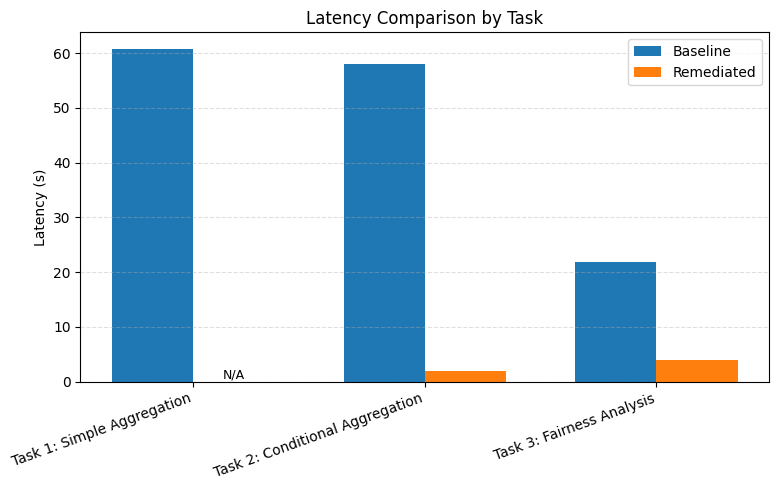

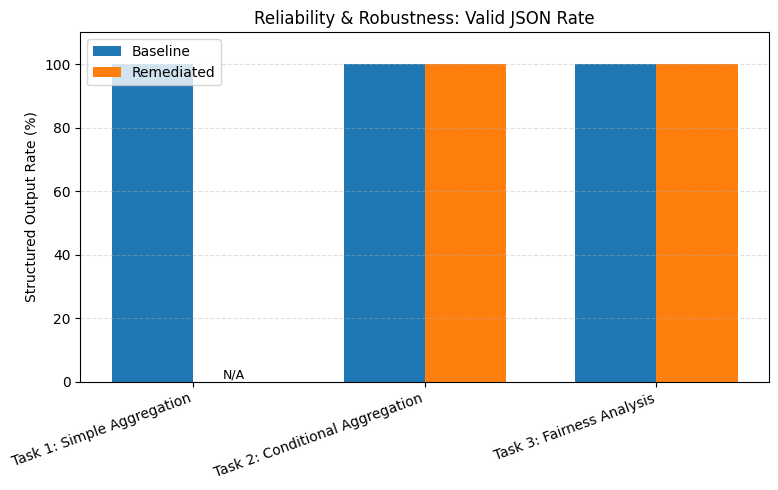

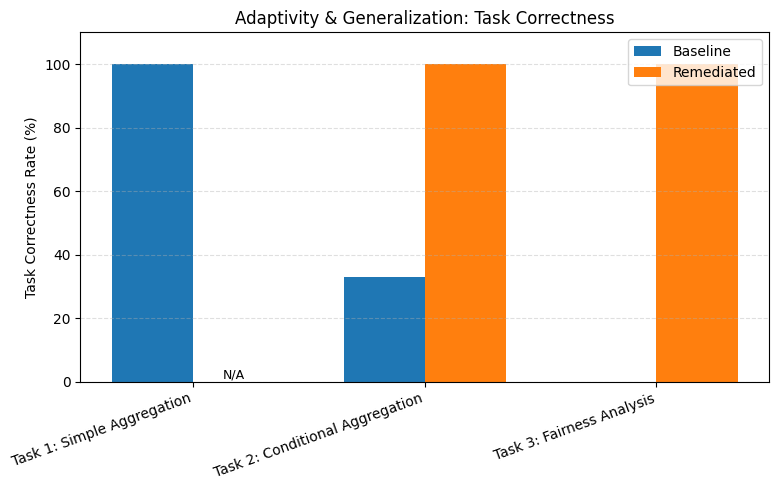

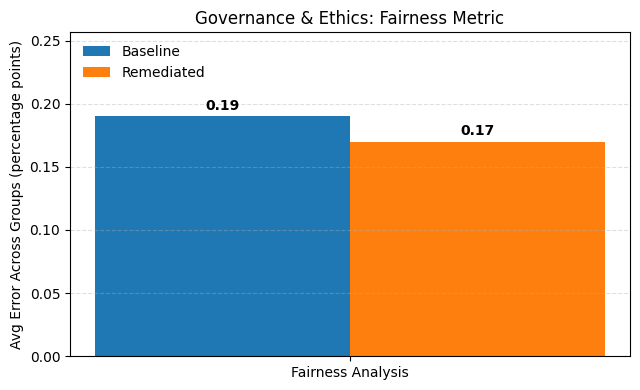

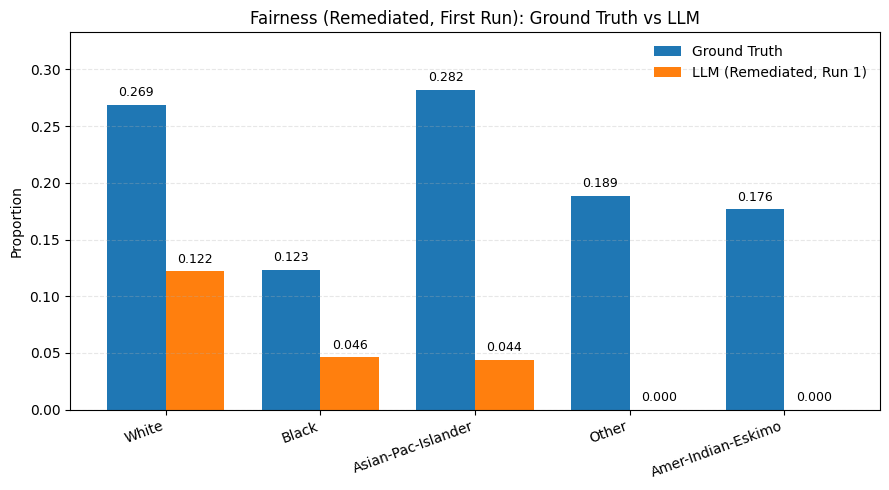

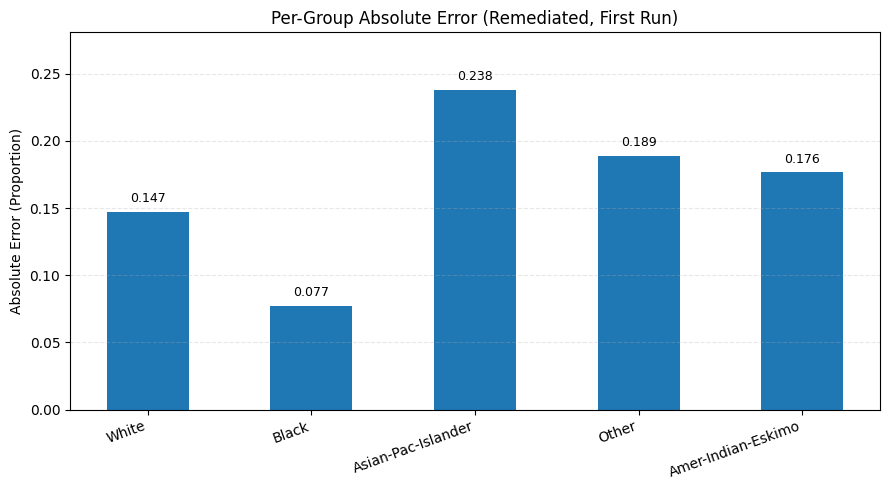

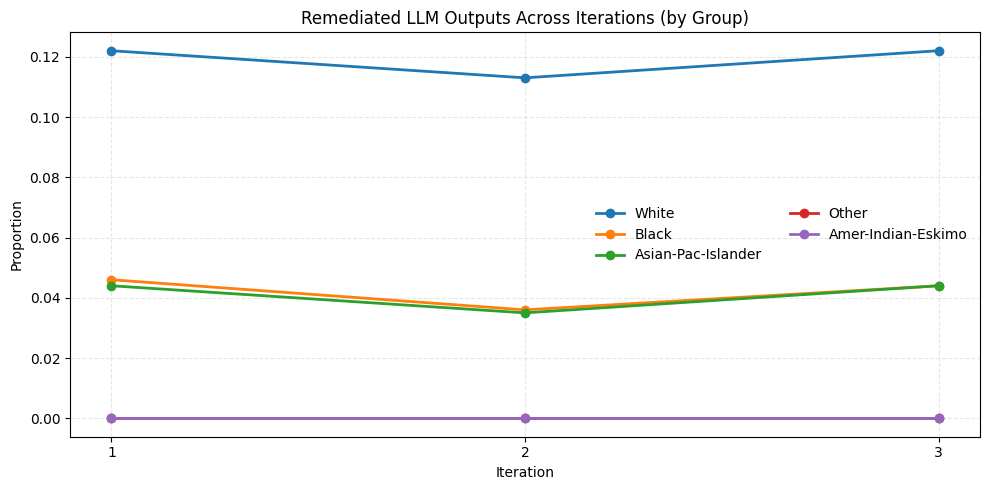

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# Data from your latest logs
# ==============================

tasks = ["Task 1: Simple Aggregation",
         "Task 2: Conditional Aggregation",
         "Task 3: Fairness Analysis"]

# --- Pillar 1: Efficiency & Scalability (Latency, seconds) ---
baseline_latency   = [60.75, 58.00, 21.83]
remediated_latency = [None,  1.89,  3.90]   # Task 1 not run in remediated

# --- Pillar 2: Reliability & Robustness (Valid JSON, %) ---
baseline_json   = [100, 100, 100]
remediated_json = [None, 100, 100]

# --- Pillar 3: Adaptivity & Generalization (Task Correctness, %) ---
baseline_correctness   = [100, 33, 0]
remediated_correctness = [None, 100, 100]

# --- Pillar 4: Governance & Ethics (Fairness Avg Error, percentage points) ---
baseline_fairness   = [None, None, 0.19]
remediated_fairness = [None, None, 0.17]

# --- Task 3 (Fairness) detailed values (Remediated) ---
groups = ['White', 'Black', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo']

ground_truth = [0.26903023983315955, 0.12319790301441677, 0.28193832599118945,
                0.18867924528301888, 0.17647058823529413]

# Remediated — first run
rem_llm_first = [0.122, 0.046, 0.044, 0.0, 0.0]

# Remediated — all three iterations
rem_llm_iters = [
    [0.122, 0.046, 0.044, 0.0, 0.0],  # Iteration 1
    [0.113, 0.036, 0.035, 0.0, 0.0],  # Iteration 2
    [0.122, 0.044, 0.044, 0.0, 0.0],  # Iteration 3
]

# ==============================
# Helper utilities
# ==============================

def none_to_zero(seq):
    """Replace None with 0 for plotting; also return mask for None."""
    vals, mask = [], []
    for v in seq:
        if v is None:
            vals.append(0)
            mask.append(True)
        else:
            vals.append(v)
            mask.append(False)
    return vals, mask

def annotate_na(ax, bars, mask):
    """Write 'N/A' above bars where original value was None."""
    for b, m in zip(bars, mask):
        if m:
            ax.text(b.get_x() + b.get_width()/2, b.get_height(),
                    "N/A", ha="center", va="bottom", fontsize=9)

def label_above(ax, bars, fmt="{:.2f}", offset=0.003):
    """Place numeric labels just above the bar tops."""
    top = ax.get_ylim()[1] or 1
    bump = max(offset, 0.01 * top * 0.3)
    for b in bars:
        h = b.get_height()
        ax.text(b.get_x() + b.get_width()/2, h + bump, fmt.format(h),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# ==============================
# 1) Latency by task
# ==============================
x = np.arange(len(tasks))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
b_vals, b_na = none_to_zero(baseline_latency)
r_vals, r_na = none_to_zero(remediated_latency)

bars_b = ax.bar(x - width/2, b_vals, width, label='Baseline')
bars_r = ax.bar(x + width/2, r_vals, width, label='Remediated')

annotate_na(ax, bars_b, b_na)
annotate_na(ax, bars_r, r_na)

ax.set_ylabel('Latency (s)')
ax.set_title('Latency Comparison by Task')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=20, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ==============================
# 2) Structured Output Rate (Valid JSON)
# ==============================
fig, ax = plt.subplots(figsize=(8, 5))
b_vals, b_na = none_to_zero(baseline_json)
r_vals, r_na = none_to_zero(remediated_json)

bars_b = ax.bar(x - width/2, b_vals, width, label='Baseline')
bars_r = ax.bar(x + width/2, r_vals, width, label='Remediated')

annotate_na(ax, bars_b, b_na)
annotate_na(ax, bars_r, r_na)

ax.set_ylabel('Structured Output Rate (%)')
ax.set_title('Reliability & Robustness: Valid JSON Rate')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=20, ha='right')
ax.legend()
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ==============================
# 3) Task Correctness Rate
# ==============================
fig, ax = plt.subplots(figsize=(8, 5))
b_vals, b_na = none_to_zero(baseline_correctness)
r_vals, r_na = none_to_zero(remediated_correctness)

bars_b = ax.bar(x - width/2, b_vals, width, label='Baseline')
bars_r = ax.bar(x + width/2, r_vals, width, label='Remediated')

annotate_na(ax, bars_b, b_na)
annotate_na(ax, bars_r, r_na)

ax.set_ylabel('Task Correctness Rate (%)')
ax.set_title('Adaptivity & Generalization: Task Correctness')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=20, ha='right')
ax.legend()
ax.set_ylim(0, 110)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# ==============================
# 4) Fairness Metric (Avg Error Across Groups, pp)
# ==============================
fig, ax = plt.subplots(figsize=(6.5, 4))
labels_f = ["Fairness Analysis"]
x2 = np.arange(len(labels_f))
bw = 0.35

bars_base = ax.bar(x2 - bw/2, [baseline_fairness[2]], bw, label='Baseline')
bars_rem  = ax.bar(x2 + bw/2, [remediated_fairness[2]], bw, label='Remediated')

# Put value labels above bars and add headroom
ax.set_ylim(0, max(baseline_fairness[2], remediated_fairness[2]) * 1.35)
label_above(ax, bars_base, fmt="{:.2f}")
label_above(ax, bars_rem,  fmt="{:.2f}")

ax.set_ylabel('Avg Error Across Groups (percentage points)')
ax.set_title('Governance & Ethics: Fairness Metric')
ax.set_xticks(x2)
ax.set_xticklabels(labels_f)
ax.legend(loc='upper left', frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# =========================================================
# Fairness-only visuals for Task 3 (Remediated) — optional
# =========================================================

# A) GT vs LLM (Remediated, First Run)
xg = np.arange(len(groups))
w = 0.38

fig, ax = plt.subplots(figsize=(9, 5))
bars_gt  = ax.bar(xg - w/2, ground_truth,  w, label='Ground Truth')
bars_llm = ax.bar(xg + w/2, rem_llm_first, w, label='LLM (Remediated, Run 1)')

# small labels above bars
ax.set_ylim(0, max(max(ground_truth), max(rem_llm_first)) * 1.18)
for bars in (bars_gt, bars_llm):
    for b in bars:
        ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.005,
                f"{b.get_height():.3f}", ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Proportion')
ax.set_title('Fairness (Remediated, First Run): Ground Truth vs LLM')
ax.set_xticks(xg)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.legend(frameon=False)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# B) Per-group Absolute Errors (Remediated, First Run)
abs_errors = [abs(a - b) for a, b in zip(ground_truth, rem_llm_first)]

fig, ax = plt.subplots(figsize=(9, 5))
bars_err = ax.bar(xg, abs_errors, width=0.5, label='|LLM - GT| (Run 1)')
ax.set_ylim(0, max(abs_errors) * 1.18 if max(abs_errors) > 0 else 0.1)
for b in bars_err:
    ax.text(b.get_x() + b.get_width()/2, b.get_height() + 0.005,
            f"{b.get_height():.3f}", ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Absolute Error (Proportion)')
ax.set_title('Per-Group Absolute Error (Remediated, First Run)')
ax.set_xticks(xg)
ax.set_xticklabels(groups, rotation=20, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# C) LLM Outputs Across 3 Iterations (lines per group)
iters = np.arange(1, len(rem_llm_iters) + 1)

fig, ax = plt.subplots(figsize=(10, 5))
for gi, g in enumerate(groups):
    ys = [rem_llm_iters[k][gi] for k in range(len(rem_llm_iters))]
    ax.plot(iters, ys, marker='o', linewidth=2, label=g)

ax.set_xlabel('Iteration')
ax.set_ylabel('Proportion')
ax.set_title('Remediated LLM Outputs Across Iterations (by Group)')
ax.set_xticks(iters)
ax.grid(axis='both', linestyle='--', alpha=0.3)
ax.legend(ncol=2, frameon=False)
plt.tight_layout()
plt.show()
